# 4.9 IC Visualization, Part 1

### This script contains the following points: <br> <br> 
1. Importing Libraries <br> <br> 
2. Importing Data Sets <br> <br> 
3. Data Checks <br><br>
4. Visualizations <br>

 > 04.01 Bar Chart: Frequency of Days of the Week <br>

 > 04.02 Histogram: Price Frequency <br>
 
 > 04.03 Line Chart: Prices by Days of the Week <br>
 >  * 04.03.01 Sampling Data for Line Chart: Prices by Days of the Week <br>
 >  * 04.03.02 Full Dataset for Line Chart: Prices by Days of the Week <br>

 > 04.04 Histogram: order_hour <br>

 > 04.05 Bar Chart: loyalty_flag <br>
 
 > 04.06 Line Chart: order_hour_of_day and prices <br>

## 01 Importing Libraries

In [1]:
# Importing Libraries including pandas, numpy, os, matlib, seaborn, scipy
# Import Libraries with visualization capabilities
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02 Importing Data

In [2]:
# First create a string of the path for the main project folder
path = r'/Users/mistystone/Library/CloudStorage/OneDrive-Personal/Documents/CF_Data_Ach4_Python/2023-05_Instacart_Basket_Analysis/'

In [3]:
# Import pickle files
# Import saved orders_products_combined.pkl as df_ords_prods_comb
df_ords_prods_merged_flags = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','orders_products_merged_flags.pkl')) 

## 03 Data Checks

In [4]:
# Check head
df_ords_prods_merged_flags.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spend_flag,frequent_orders,frequent_flag
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Mid-range product,Regularly busy,Regular busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer


In [5]:
# Check shape
df_ords_prods_merged_flags.shape

(32404859, 23)

## 04 Visualizations

### 04.01 Bar Chart: Frequency of Days of the Week

<Axes: >

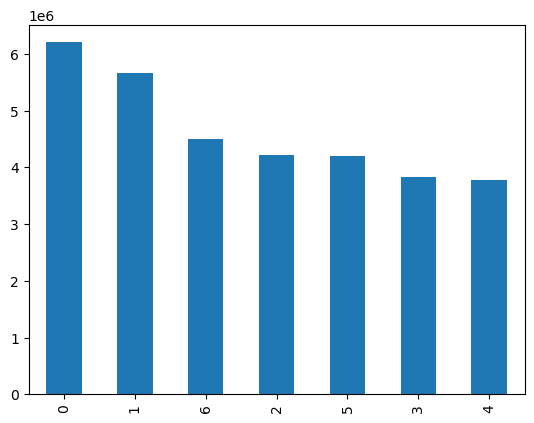

In [6]:
# Bar charts
df_ords_prods_merged_flags['order_day_of_week'].value_counts().plot.bar()
# The plot.bar() tells Python to find the bar() function within the plot module.
# Must always remember to run this function on the frequency of the column.
# Otherwise it could take considerable time to produce the chart.

<Axes: >

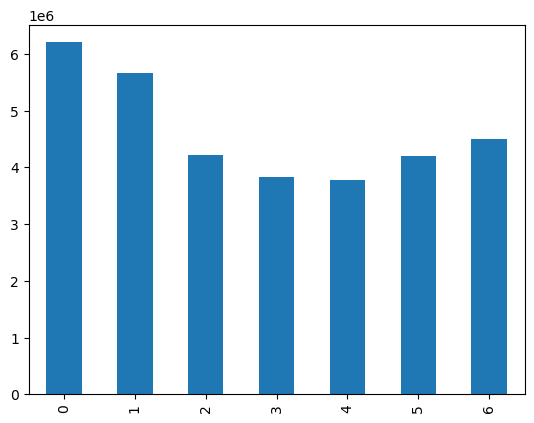

In [7]:
# Sort by day number
df_ords_prods_merged_flags['order_day_of_week'].value_counts().sort_index().plot.bar()

In [8]:
# The same trick, adding sort_index(), can be used for frequencies as well.
df_ords_prods_merged_flags['order_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: order_day_of_week, dtype: int64

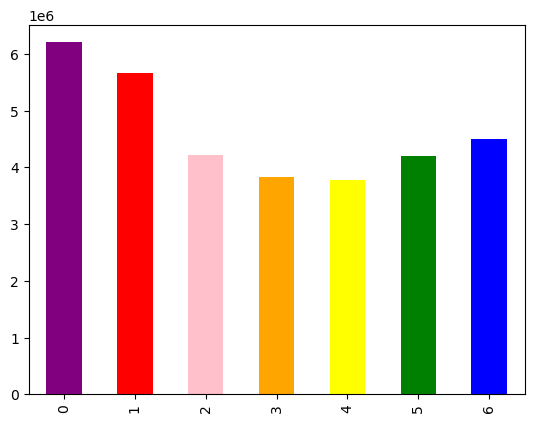

In [9]:
# Add color
bar = df_ords_prods_merged_flags['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red','pink','orange','yellow','green','blue'])
# the bar = saves it in Jupyter's memory

In [10]:
# Export
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### 04.02 Histogram: Price Frequency

<Axes: ylabel='Frequency'>

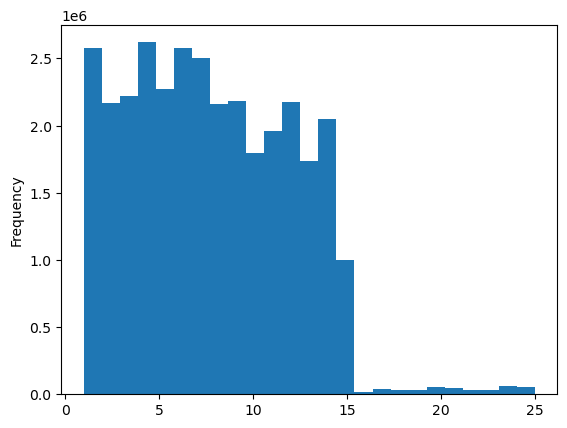

In [11]:
# histogram
df_ords_prods_merged_flags['prices'].plot.hist(bins = 25)

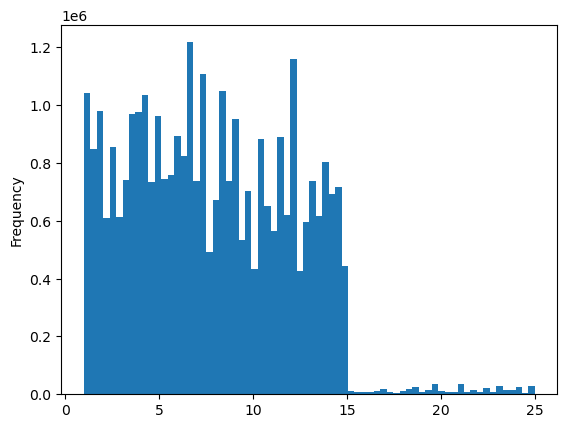

In [12]:
# Increase granularity
hist = df_ords_prods_merged_flags['prices'].plot.hist(bins = 70)

In [13]:
# Export
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

### 04.03 Line Chart: Prices by Days of the Week

#### 04.03.01 Sampling Data for Line Chart: Prices by Days of the Week

In [14]:
# Use a sample of the data
# not a subset because it is not a representative of the population
np.random.seed(4)

In [15]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(df_ords_prods_merged_flags)) <= 0.7

In [16]:
# Store 70% of the sample in the dataframe big
big = df_ords_prods_merged_flags[dev]

In [17]:
# Store 30% of the sample in the dataframe small
small = df_ords_prods_merged_flags[~dev]

In [18]:
# consistency check
big.shape

(22683761, 23)

In [19]:
# consistency check
small.shape

(9721098, 23)

In [20]:
# consistency check
len(df_ords_prods_merged_flags)

32404859

In [21]:
# consistency check
len(big) + len(small)

32404859

In [22]:
# Reduce to only necessary columns
df_redacted = small[['order_day_of_week','prices']]

In [23]:
# consistency check
df_redacted.head()

,order_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0


In [24]:
# consistency check
df_redacted.describe()

,order_day_of_week,prices
count,9.721098e+06,9.719502e+06
mean,2.740095e+00,7.791261e+00
std,2.090351e+00,4.242010e+00
min,0.000000e+00,1.000000e+00
25%,1.000000e+00,4.200000e+00
50%,3.000000e+00,7.400000e+00
75%,5.000000e+00,1.130000e+01
max,6.000000e+00,2.500000e+01


KeyboardInterrupt: 

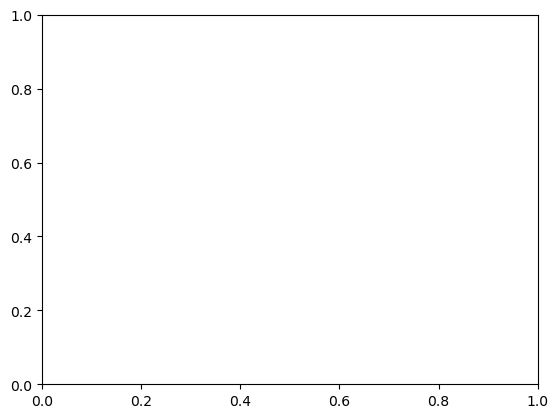

In [25]:
# Line chart
line = sns.lineplot(data = df_redacted, x = 'order_day_of_week',y = 'prices')

#### 04.03.02 Full Dataset for Line Chart: Prices by Days of the Week

In [ ]:
# Full dataset: Reduce to only necessary columns
df_full_redacted = df_ords_prods_merged_flags[['order_day_of_week','prices']]

In [ ]:
# Check
df_full_redacted.head()

In [ ]:
# Line chart
line = sns.lineplot(data = df_full_redacted, x = 'order_day_of_week',y = 'prices')

In [ ]:
# Export line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow.png'))

### 04.04 Histogram: order_hour

In [ ]:
#histogram
histogram_order_hour = df_ords_prods_merged_flags['order_hour_of_day'].plot.hist(bins = 24)

In [ ]:
# Freqency table
df_ords_prods_merged_flags['order_hour_of_day'].value_counts().sort_index()

Most orders are placed in the late morning and early afternoon. The middle of the night is not a popular time to place an order. The peak is during the 10:00 hour.

In [ ]:
# Export
histogram_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_order_hour.png'))

### 04.05 Bar Chart: loyalty_flag

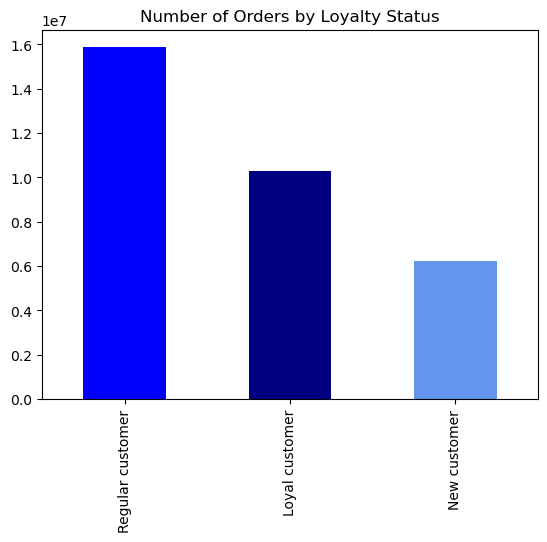

In [28]:
# bar chart
bar_loyaltyflag = df_ords_prods_merged_flags['loyalty_flag'].value_counts().plot.bar(color=['blue','navy','cornflowerblue'], title='Number of Orders by Loyalty Status')

In [29]:
# Export
bar_loyaltyflag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyaltyflag_NumOrders.png'), bbox_inches='tight')

In [40]:
# Crosstab to find number of customers in each loyalty status category
crosstab_loyalty_customers = pd.crosstab(df_ords_prods_merged_flags['user_id'],df_ords_prods_merged_flags['loyalty_flag'], dropna=False)

In [33]:
# Create bar chart of number customers in each loyalty status category
bar_loyaltyflag_cust = crosstab_loyalty_customers.plot.bar

In [41]:
crosstab_loyalty_customers

loyalty_flag,Loyal customer,New customer,Regular customer
user_id,,,
1,0,59,0
2,0,0,195
3,0,0,88
4,0,18,0
5,0,37,0
...,...,...,...
206205,0,32,0
206206,285,0,0
206207,0,0,223


In [42]:
# Crosstab to clipboard
crosstab_loyalty_customers.to_clipboard()

### 04.06 Line Chart: order_hour_of_day and prices

In [ ]:
# Using the random sample from section 04.03 to create this line chart!
# Reduce to only necessary columns
df_redacted = small[['order_hour_of_day','prices']]

In [ ]:
# consistency check
df_redacted.head()

In [ ]:
# consistency check
df_redacted.describe()

In [ ]:
# Line chart
line_hour_prices = sns.lineplot(data = df_redacted, x = 'order_hour_of_day', y = 'prices')

The middle of the night purchases tend to be more expensive than the mid morning orders!

In [ ]:
# Export
line_hour_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_prices.png'))